In [5]:
#1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix as sk_conf_matrix
 
# Load the dataset
df = pd.read_csv('C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv')
 
# Assume the last column is the target variable and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Train the model with increased max_iter
model = LogisticRegression(max_iter=2000)  # Increase max_iter to 2000
model.fit(X_train, y_train)
 
# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
 
# Ensure class labels are zero-based
classes = np.unique(y)
class_mapping = {label: index for index, label in enumerate(classes)}
y_train_mapped = np.array([class_mapping[label] for label in y_train])
y_test_mapped = np.array([class_mapping[label] for label in y_test])
y_train_pred_mapped = np.array([class_mapping[label] for label in y_train_pred])
y_test_pred_mapped = np.array([class_mapping[label] for label in y_test_pred])
 
# Compute confusion matrices
def confusion_matrix(y_true, y_pred, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true, pred] += 1
    return matrix
 
num_classes = len(classes)
train_conf_matrix = confusion_matrix(y_train_mapped, y_train_pred_mapped, num_classes)
test_conf_matrix = confusion_matrix(y_test_mapped, y_test_pred_mapped, num_classes)
 
print('Training Confusion Matrix:\n', train_conf_matrix)
print('Test Confusion Matrix:\n', test_conf_matrix)
 
# Compute performance metrics
def precision_recall_f1(conf_matrix):
    precisions = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0, where=np.sum(conf_matrix, axis=0)!=0)
    recalls = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1, where=np.sum(conf_matrix, axis=1)!=0)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    f1_scores[np.isnan(f1_scores)] = 0  # Handle NaN from division by zero
    return precisions, recalls, f1_scores
 
train_precisions, train_recalls, train_f1_scores = precision_recall_f1(train_conf_matrix)
test_precisions, test_recalls, test_f1_scores = precision_recall_f1(test_conf_matrix)
 
print('Training Precision:', train_precisions)
print('Training Recall:', train_recalls)
print('Training F1-Score:', train_f1_scores)
 
print('Test Precision:', test_precisions)
print('Test Recall:', test_recalls)
print('Test F1-Score:', test_f1_scores)
 
# Infer model learning outcome
def infer_learning_outcome(train_f1_scores, test_f1_scores):
    if np.all(test_f1_scores < train_f1_scores):
        return 'Possible Overfitting'
    elif np.all(test_f1_scores > train_f1_scores):
        return 'Possible Underfitting'
    else:
        return 'Regular Fit'
 
learning_outcome = infer_learning_outcome(train_f1_scores, test_f1_scores)
print('Model Learning Outcome:', learning_outcome)


Training Confusion Matrix:
 [[37  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 28]]
Test Confusion Matrix:
 [[11  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 13]]
Training Precision: [0.94871795 1.         1.         1.         1.                nan
 1.         0.96              nan 0.74193548 0.6875     1.
 0.96078431        nan 1.                nan        nan 1.
 0.90243902 1.         1.         1.         0.93220339 1.
 1.         1.         0.94202899 1.         1.         1.
 0.96875    0.98039216 1.         0.96875    1.         0.92682927
 1.         1.         0.98214286 1.         0.97560976 1.
 1.         1.         1.         1.         1.         1.        ]
Training Recall: [1.         1.         1.         1.         1.                nan
 1.         0.92307692        nan 0

C:\Users\Dell\AppData\Local\Temp\ipykernel_11896\3525674389.py:55: RuntimeWarning: invalid value encountered in divide
  precisions = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0, where=np.sum(conf_matrix, axis=0)!=0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_11896\3525674389.py:56: RuntimeWarning: invalid value encountered in divide
  recalls = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1, where=np.sum(conf_matrix, axis=1)!=0)


In [6]:
#2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# Load the dataset
df = pd.read_csv('C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv')
 
# Assume the last column is the target variable (price) and the rest are features
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
 
# Predict on test data
y_test_pred = model.predict(X_test)
 
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)
 
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
 
# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_indices = y_true != 0
    return np.mean(np.abs((y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices])) * 100
 
mape = mean_absolute_percentage_error(y_test, y_test_pred)
 
# Calculate R^2 score
r2 = r2_score(y_test, y_test_pred)
 
# Print the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"R^2 Score: {r2:.4f}")
 
# Analyze results
def analyze_results(mse, rmse, mape, r2):
    print("\nAnalysis:")
    if r2 < 0:
        print("The model performs worse than a horizontal line (mean value).")
    elif r2 > 0.8:
        print("The model explains a high proportion of variance and performs well.")
    elif r2 > 0.5:
        print("The model explains a moderate proportion of variance.")
    else:
        print("The model explains a low proportion of variance.")
    print(f"Lower MSE and RMSE indicate better model performance.")
    print(f"MAPE provides a percentage error; lower values indicate better prediction accuracy.")
    print(f"Compare R^2 with a baseline model to determine improvement.")
 
analyze_results(mse, rmse, mape, r2)

Mean Squared Error (MSE): 2285.9651
Root Mean Squared Error (RMSE): 47.8118
Mean Absolute Percentage Error (MAPE): 0.5702%
R^2 Score: -1.5449

Analysis:
The model performs worse than a horizontal line (mean value).
Lower MSE and RMSE indicate better model performance.
MAPE provides a percentage error; lower values indicate better prediction accuracy.
Compare R^2 with a baseline model to determine improvement.


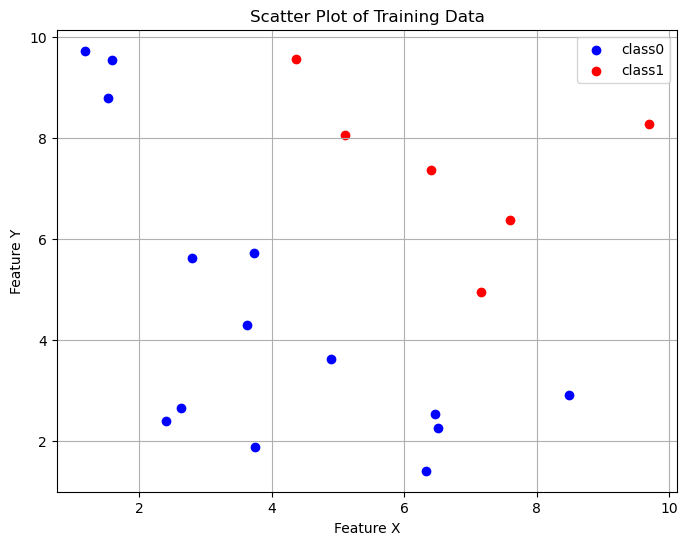

In [7]:
#3
import numpy as np
import matplotlib.pyplot as plt
 
# Set random seed for reproducibility
np.random.seed(42)
 
# Generate 20 random data points for features X and Y
X = np.random.uniform(1, 10, size=(20, 2))
 
# Define class labels based on some arbitrary rule or clustering (e.g., based on X and Y values)
# Here we'll use a simple rule: if the sum of X and Y is greater than 12, class1 (Red), else class0 (Blue)
y = (X[:, 0] + X[:, 1] > 12).astype(int)
 
# Define class colors
colors = ['blue', 'red']
 
# Plotting
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1],
                color=colors[class_label], label=f'class{class_label}')
 
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

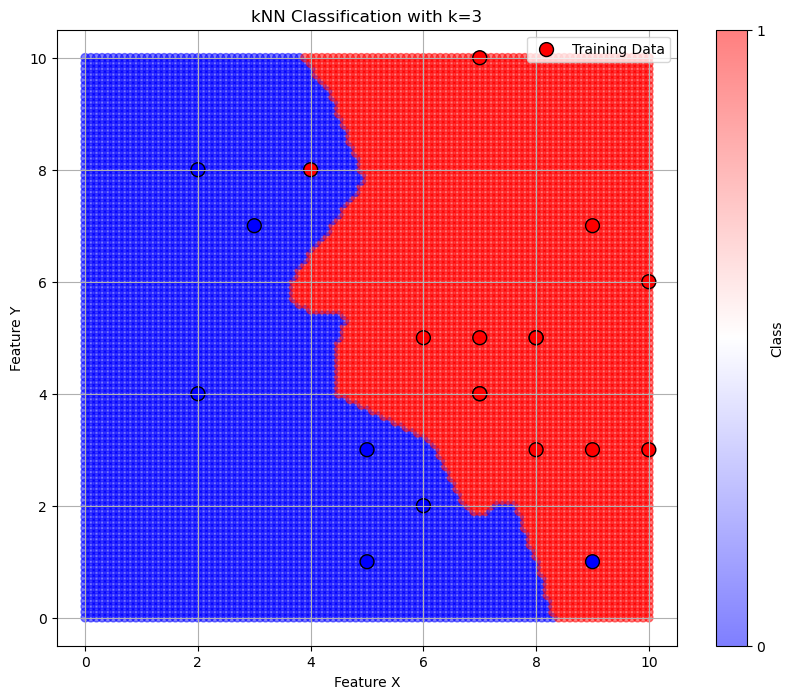

In [9]:
#4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate the Training Data (as per previous step)
np.random.seed(42)  # For reproducibility
X_train = np.random.randint(1, 11, size=(20, 2))  # 20 data points, 2 features (X & Y)

# Assign classes based on the sum of the features > 10 as Class 1 (Red), else Class 0 (Blue)
y_train = np.where(np.sum(X_train, axis=1) > 10, 1, 0)

# Step 2: Generate the Test Set
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_points = np.c_[X_test.ravel(), Y_test.ravel()]

# Step 3: Train the kNN Classifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 4: Classify the Test Data
predicted_classes = knn.predict(test_points)

# Step 5: Plotting the Classified Test Data
plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap='bwr', alpha=0.5)
plt.colorbar(ticks=[0, 1], label='Class')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', marker='o', s=100, label='Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title(f'kNN Classification with k={k}')
plt.grid(True)
plt.legend()
plt.show()


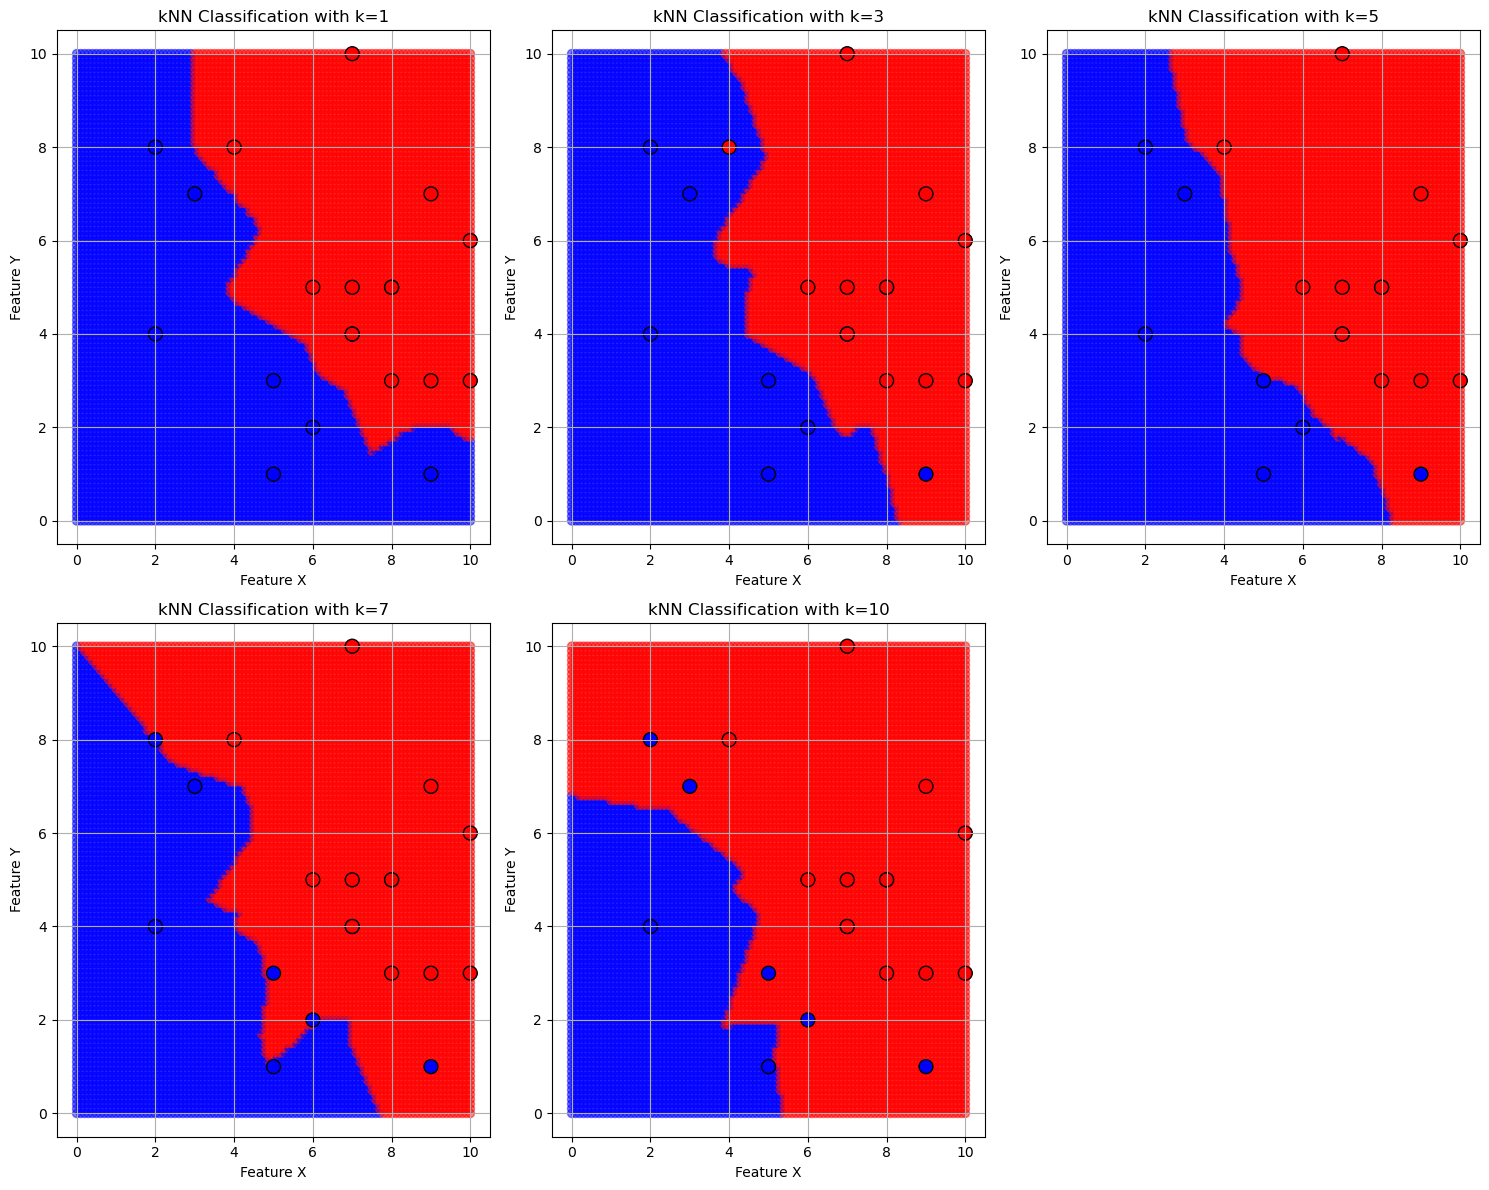

In [10]:
#5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Generate the Training Data
np.random.seed(42)
X_train = np.random.randint(1, 11, size=(20, 2))  # 20 data points, 2 features (X & Y)

# Assign classes based on the sum of the features > 10 as Class 1 (Red), else Class 0 (Blue)
y_train = np.where(np.sum(X_train, axis=1) > 10, 1, 0)

# Step 2: Generate the Test Set
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_points = np.c_[X_test.ravel(), Y_test.ravel()]

# Step 3: Loop through different values of k and plot the results
k_values = [1, 3, 5, 7, 10]  # Different values of k to observe

plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):
    # Train the kNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Classify the Test Data
    predicted_classes = knn.predict(test_points)

    # Plotting the Classified Test Data
    plt.subplot(2, 3, i)
    plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap='bwr', alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', marker='o', s=100, label='Training Data')
    plt.title(f'kNN Classification with k={k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.grid(True)

plt.tight_layout()
plt.show()


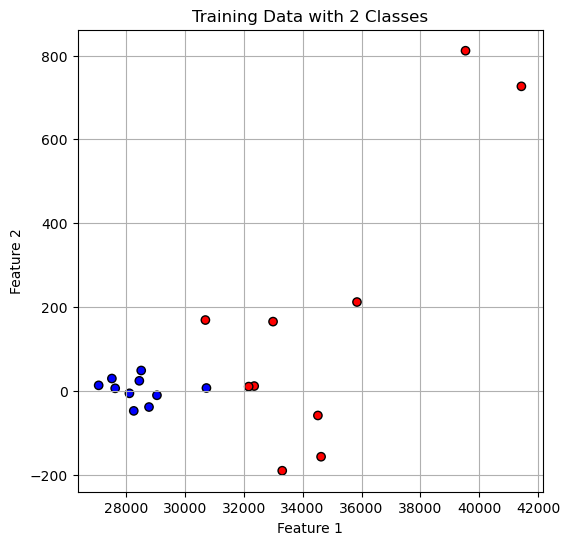

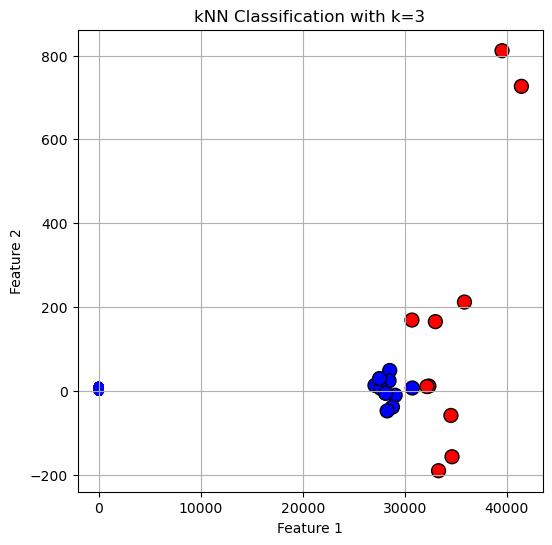

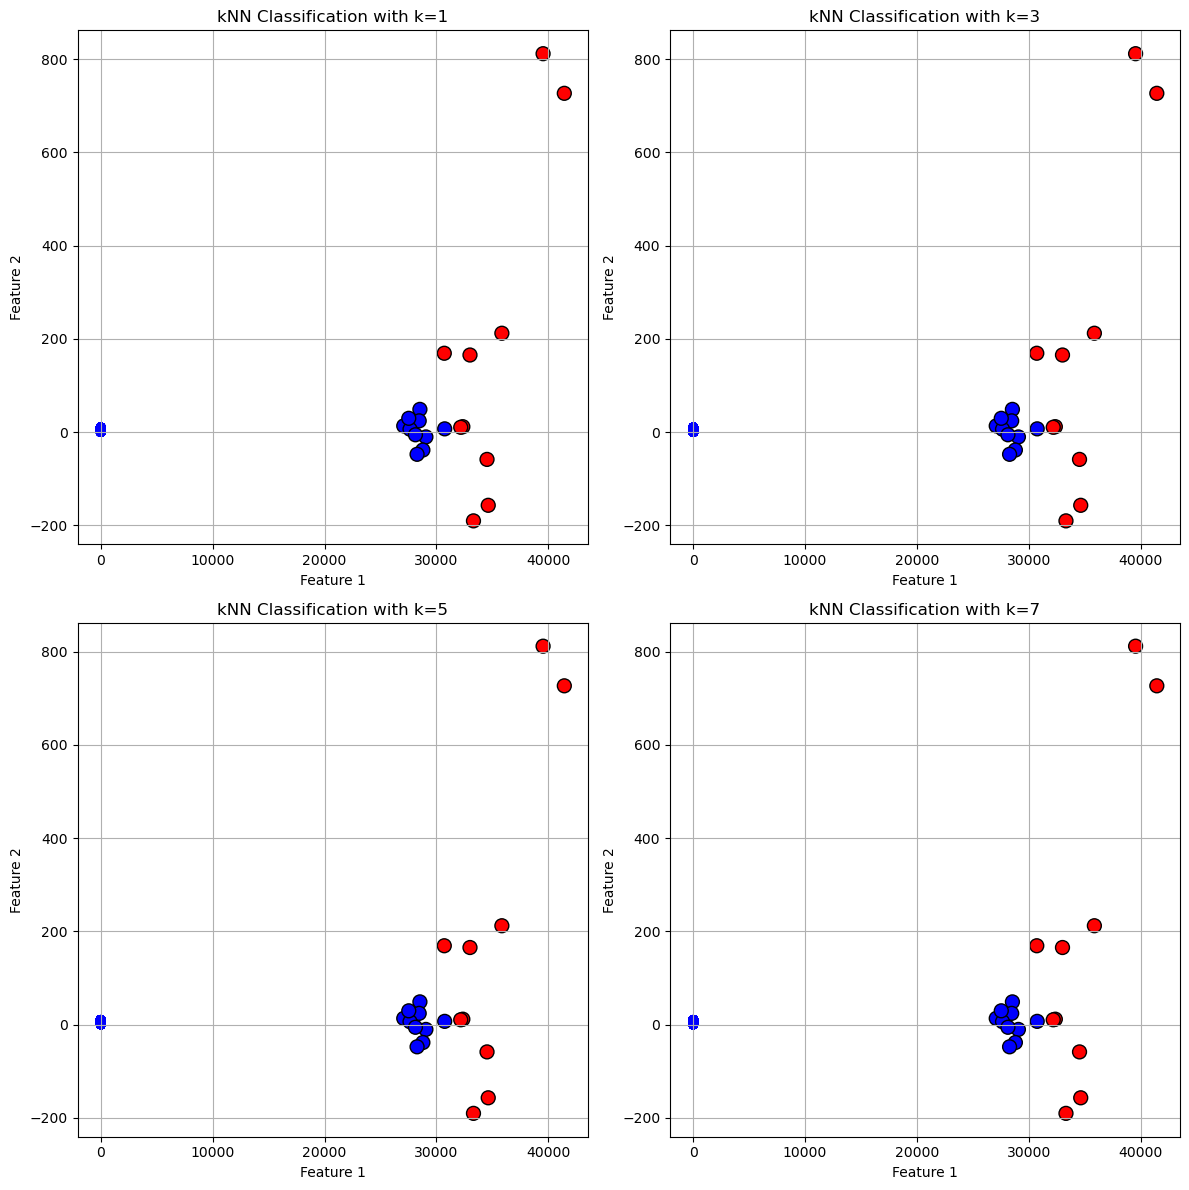

In [11]:
#6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv')

# Select two features (for example, the first two columns)
X_data = df.iloc[:, [0, 1]].values
y_data = df.iloc[:, -1].values  # Assume the last column is the target variable

# Step A3: Generate Training Data
np.random.seed(42)
indices = np.random.choice(len(X_data), 20, replace=False)
X_train = X_data[indices]
y_train = np.where(np.sum(X_train, axis=1) > np.median(np.sum(X_train, axis=1)), 1, 0)  # Assign classes

# Plot the training data
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k')
plt.title('Training Data with 2 Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Step A4: Generate Test Data and Classify
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values, y_values)
test_points = np.c_[X_test.ravel(), Y_test.ravel()]

# Use kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predicted_classes = knn.predict(test_points)

# Plotting the classified test data
plt.figure(figsize=(6, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap='bwr', alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', marker='o', s=100, label='Training Data')
plt.title('kNN Classification with k=3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Step A5: Repeat for various values of k
k_values = [1, 3, 5, 7]

plt.figure(figsize=(12, 12))
for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predicted_classes = knn.predict(test_points)

    plt.subplot(2, 2, i)
    plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap='bwr', alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', marker='o', s=100, label='Training Data')
    plt.title(f'kNN Classification with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

plt.tight_layout()
plt.show()


Best k value: 1
Accuracy with best k=1: 0.35


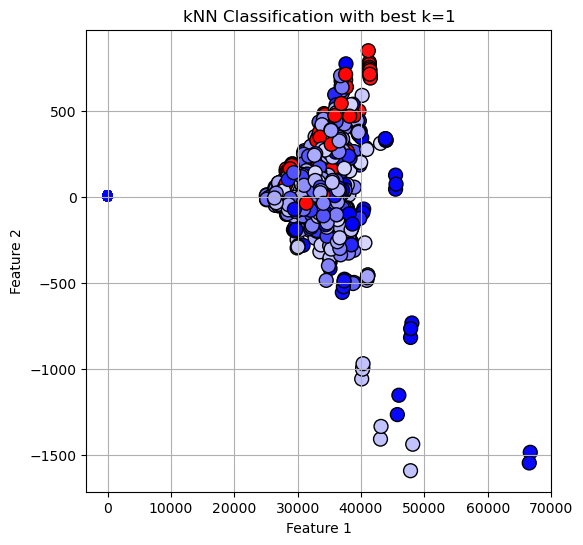

In [12]:
#7
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('C:/Users/Dell/Downloads/DCT_withoutduplicate 7.csv')

# Select two features and the target variable
X_data = df.iloc[:, [0, 1]].values  # Assuming we are working with the first two features
y_data = df.iloc[:, -1].values      # Assuming the target variable is the last column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameter (k value)
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Evaluate the model with the best k value
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy with best k={best_k}: {accuracy:.2f}")

# Optional: Refit and visualize the results with the best k
import matplotlib.pyplot as plt

# Generate test data for visualization
x_values = np.arange(0, 10.1, 0.1)
y_values = np.arange(0, 10.1, 0.1)
X_mesh, Y_mesh = np.meshgrid(x_values, y_values)
test_points = np.c_[X_mesh.ravel(), Y_mesh.ravel()]

# Predict with the best model
predicted_classes = best_knn.predict(test_points)

# Plotting the classified test data
plt.figure(figsize=(6, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=predicted_classes, cmap='bwr', alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', marker='o', s=100, label='Training Data')
plt.title(f'kNN Classification with best k={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()
